In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
tmdb_extra_info = pd.read_csv('./generated/TMDB_extra_info.csv')
movie_char = pd.read_csv('./generated/movie_characters.csv')
movie_char_eth = pd.read_csv('./generated/movie_characters_ethnicity.csv')

# Gender diversity preprocessing

In [3]:
movie_char

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_box_office_revenue,character_freebase_id,actor_freebase_id,character_actor_freebase_map_id,character_name,actor_name,actor_gender,actor_age_at_movie_release,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgcj3x,/m/03wcfv7,/m/0bgchxw,Akooshay,Wanda De Jesus,F,42.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchn4,/m/0346l4,/m/0jys3m,Lieutenant Melanie Ballard,Natasha Henstridge,F,27.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchn_,/m/01vw26l,/m/0jys3g,Desolation Williams,Ice Cube,M,32.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchnq,/m/034hyc,/m/02vchl6,Sgt Jericho Butler,Jason Statham,M,33.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchp9,/m/01y9xg,/m/02vbb3r,Bashira Kincaid,Clea DuVall,F,23.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450268,12476867,/m/02w7zz8,Spliced,2002.0,22,NaN,NaN,/m/0gc4lfm,/m/0gchkcy,NaN,Billy Morton,NaN,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."
450269,12476867,/m/02w7zz8,Spliced,2002.0,22,NaN,NaN,/m/0gbx_rk,/m/0gckh4f,NaN,Andrea Runge,NaN,19.0,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."
450270,12476867,/m/02w7zz8,Spliced,2002.0,22,NaN,NaN,/m/0gby01h,/m/0gcp8fv,NaN,Wendy Anderson,F,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."
450271,12476867,/m/02w7zz8,Spliced,2002.0,22,NaN,NaN,/m/0gdkb55,/m/0gdkb51,NaN,Ariel Bastian,NaN,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."


In [4]:
def calculate_gender_diversity(movie_diversities):
    # Filter out rows where actor_gender is NaN
    movie_diversities = movie_diversities.dropna(subset=['actor_gender'])

    # Group by movie_wikipedia_id and count each gender
    gender_counts = movie_diversities.groupby('movie_freebase_id')['actor_gender'].value_counts().unstack(fill_value=0)

    # Calculate the total number of actors for each movie
    total_actors = movie_diversities.groupby('movie_freebase_id')['actor_gender'].count()

    # Calculate the Simpson Diversity Index
    total_counts = gender_counts.sum(axis=1)
    squared_proportions = (gender_counts.divide(total_counts, axis=0) ** 2).sum(axis=1)
    diversity_index = 1 - squared_proportions

    # Create a DataFrame for the calculated values
    diversity_data = pd.DataFrame({
        'gender_diversity': diversity_index,
        'actors_count': total_actors
    })

    # Merge the calculated values back with the original DataFrame
    result = movie_diversities.merge(diversity_data, on='movie_freebase_id', how='inner')

    return result


In [5]:
gender_diversities_df = calculate_gender_diversity(movie_char).sort_values(by="actors_count", ascending=False)
gender_diversities_df = gender_diversities_df.drop_duplicates(subset='movie_freebase_id')

gender_diversities_df['movie_genres'] = gender_diversities_df['movie_genres'].apply(lambda s: ast.literal_eval(str(s)))
gender_diversities_df['movie_genres'] = gender_diversities_df['movie_genres'].apply(lambda d: list(d.values()))

# Now the movie genres can be directly accessed as a numpy array :
# accessed gender_diversities_df['movie_genres'].to_numpy()

merged_df = gender_diversities_df.merge(tmdb_extra_info, on='movie_freebase_id', how='inner')
merged_df = merged_df[['movie_freebase_id', 'movie_name', 'movie_release_year', 'movie_languages_count', 'movie_genres', 'gender_diversity', 'actors_count', 'rating_average', 'rating_count', 'movie_box_office_revenue']]

merged_df

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,gender_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/0cc8620,Hemingway & Gellhorn,2012.0,22,"[Romance Film, Drama]",0.377164,115,6.000,158,NaN
1,/m/04grkmd,Taking Woodstock,2009.0,22,"[Indie, Slice of life story, Comedy-drama, Per...",0.409565,87,6.211,405,9930139.0
2,/m/02725hs,Captain Corelli's Mandolin,2001.0,35,"[Film adaptation, War film, Period piece, Dram...",0.371895,81,5.946,488,62112895.0
3,/m/02qr3k8,Terror in the Aisles,1984.0,22,"[Thriller, Horror, Documentary]",0.491782,78,6.100,37,10004817.0
4,/m/0pb33,Speed,1994.0,27,"[Thriller, Action/Adventure, Action, Crime Fic...",0.472318,68,7.120,5702,350448145.0
...,...,...,...,...,...,...,...,...,...,...
34458,/m/080cd3h,Cruel Restaurant,2008.0,21,"[Japanese Movies, Horror, Comedy, World cinema]",0.000000,1,4.700,19,NaN
34459,/m/047f_x9,Freelance,1971.0,22,[Thriller],0.000000,1,4.700,3,NaN
34460,/m/0fqbz1,Somewhere in Georgia,1917.0,22,"[Short Film, Silent film, Drama, Indie, Black-...",0.000000,1,0.000,0,NaN
34461,/m/0crj1bq,Tar Creek,2009.0,22,"[Drama, Documentary]",0.000000,1,9.000,1,NaN


In [6]:
# Remove missing actors and missing genders
cleaned_df = merged_df[merged_df['actors_count'] > 1]
print(cleaned_df.shape)

(30672, 10)


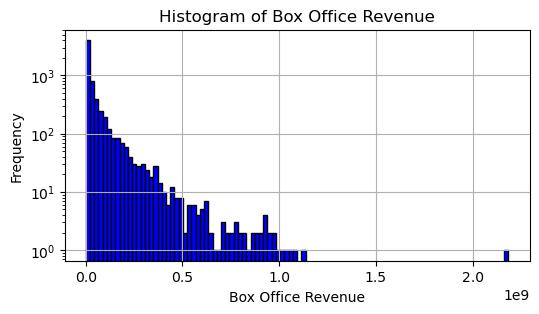

In [7]:
# Plotting the histogram
plt.figure(figsize=(6, 3))
plt.hist(cleaned_df['movie_box_office_revenue'], bins=100, color='blue', edgecolor='black', log=True)
plt.title('Histogram of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keeping only the rows that do not contain outliers or are NaN
    condition = ((df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)) | df[column_name].isna()
    cleaned_df = df[condition]

    return cleaned_df

In [9]:
# Remove box office outliers
cleaned_df2 = remove_outliers(cleaned_df, "movie_box_office_revenue")
print(cleaned_df2.shape)

(29887, 10)


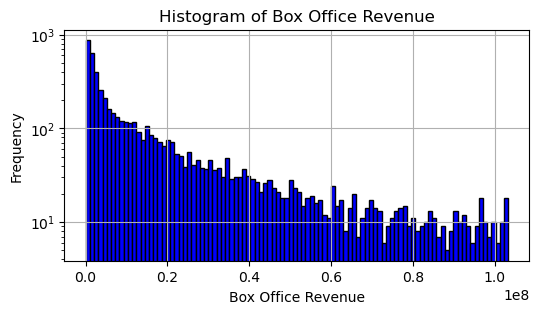

In [10]:
# Plotting the histogram
plt.figure(figsize=(6, 3))
plt.hist(cleaned_df2['movie_box_office_revenue'], bins=100, color='blue', edgecolor='black', log=True)
plt.title('Histogram of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

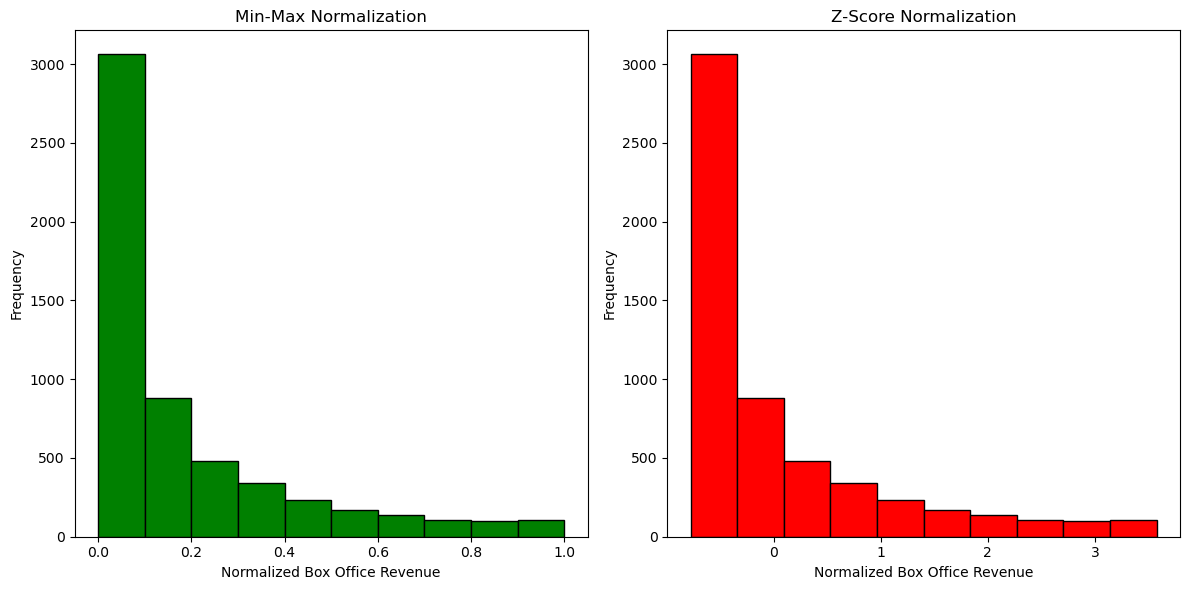

In [11]:
# Normalizing using Min-Max Scaling
normalized_minmax = (cleaned_df2['movie_box_office_revenue'] - cleaned_df2['movie_box_office_revenue'].min()) / (cleaned_df2['movie_box_office_revenue'].max() - cleaned_df2['movie_box_office_revenue'].min())

# Normalizing using Z-Score Normalization
normalized_zscore = (cleaned_df2['movie_box_office_revenue'] - cleaned_df2['movie_box_office_revenue'].mean()) / cleaned_df2['movie_box_office_revenue'].std()

# Plotting histograms for both normalization techniques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(normalized_minmax, bins=10, color='green', edgecolor='black')
plt.title('Min-Max Normalization')
plt.xlabel('Normalized Box Office Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normalized_zscore, bins=10, color='red', edgecolor='black')
plt.title('Z-Score Normalization')
plt.xlabel('Normalized Box Office Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
def normalize_columns_zscore(df):
    for column in df.columns:
        # Compute the mean and std, skipping NaN values
        mean = df["movie_box_office_revenue"].mean()
        std = df["movie_box_office_revenue"].std()

        # Apply Z-score normalization, leaving NaN values as they are
        df["movie_box_office_revenue"] = df["movie_box_office_revenue"].apply(lambda x: (x - mean) / std if not pd.isna(x) else x)

    return df

In [13]:
# Use the function on your DataFrame
normalized_df = normalize_columns_zscore(cleaned_df2.copy())

normalized_df

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,gender_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/0cc8620,Hemingway & Gellhorn,2012.0,22,"[Romance Film, Drama]",0.377164,115,6.000,158,NaN
1,/m/04grkmd,Taking Woodstock,2009.0,22,"[Indie, Slice of life story, Comedy-drama, Per...",0.409565,87,6.211,405,-0.358824
2,/m/02725hs,Captain Corelli's Mandolin,2001.0,35,"[Film adaptation, War film, Period piece, Dram...",0.371895,81,5.946,488,1.840898
3,/m/02qr3k8,Terror in the Aisles,1984.0,22,"[Thriller, Horror, Documentary]",0.491782,78,6.100,37,-0.355676
5,/m/01w8g3,Calendar Girls,2003.0,22,"[Ensemble Film, Drama, Indie, Comedy]",0.492654,66,6.593,350,3.292231
...,...,...,...,...,...,...,...,...,...,...
30667,/m/0hzqvb3,Varnam,2010.0,21,[Drama],0.500000,2,0.000,0,NaN
30668,/m/02pqq45,We're All Christs,2006.0,22,[Drama],0.000000,2,6.643,42,NaN
30669,/m/09j44z,Rip Girls,2000.0,22,[Family Film],0.500000,2,6.400,59,NaN
30670,/m/0514m7q,Touch the Sound,2004.0,22,"[Music, Instrumental Music, Biography, World c...",0.500000,2,7.300,11,-0.769968


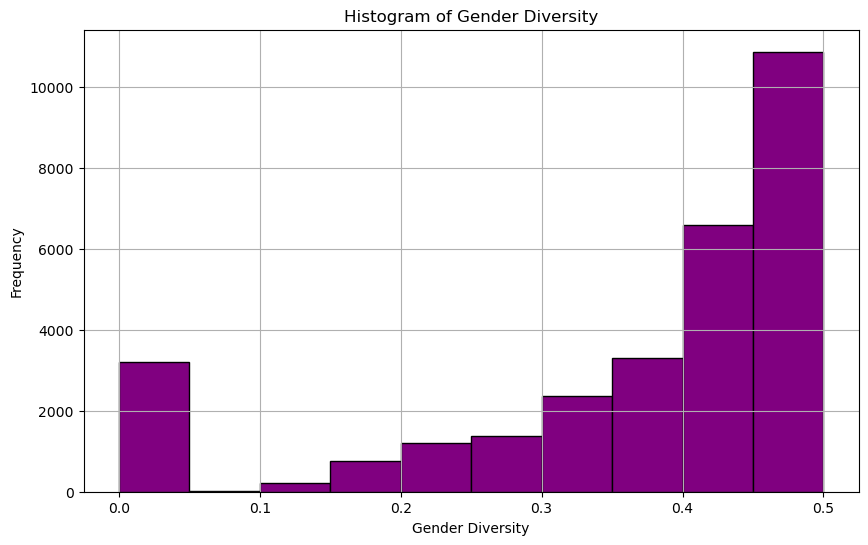

In [14]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(normalized_df['gender_diversity'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Gender Diversity')
plt.xlabel('Gender Diversity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Ethnicity diversity preprocessing

In [15]:
movie_char_eth

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_box_office_revenue,character_freebase_id,actor_freebase_id,character_actor_freebase_map_id,character_name,actor_name,actor_gender,actor_age_at_movie_release,movie_genres,actor_ethnicity
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchn_,/m/01vw26l,/m/0jys3g,Desolation Williams,Ice Cube,M,32.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",African Americans
1,975900,/m/03vyhn,Ghosts of Mars,2001.0,22,14010832.0,/m/0bgchnd,/m/0418ft,/m/02vdcfp,Commander Helena Braddock,Pam Grier,F,52.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",African Americans
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,22,NaN,NaN,/m/01lntp,/m/0lr37dy,NaN,Albert Hall,M,62.0,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",African Americans
3,156558,/m/014k4y,Baby Boy,2001.0,22,29381649.0,/m/03jnxj_,/m/0blbxk,/m/0jtx5t,Yvette,Taraji P. Henson,F,30.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",African Americans
4,156558,/m/014k4y,Baby Boy,2001.0,22,29381649.0,/m/03jnxf4,/m/01l1b90,/m/0jtx5h,Jody,Tyrese Gibson,M,22.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",African Americans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102929,23710393,/m/06zt03v,Battle: Los Angeles,2011.0,22,NaN,/m/0gfjqw8,/m/0h64kl,/m/0gfjqwt,Corpsman Jibril Adukwu,Adetokumboh McCormack,M,NaN,"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",Sierra Leone Creole people
102930,29188071,/m/0crw88f,Night of the Living Dorks,2004.0,20,NaN,/m/0gbmz5c,/m/0f2_hl,/m/0gbmz7d,Rebecca,Collien Fernandes,F,22.0,"{""/m/05p553"": ""Comedy film"", ""/m/03npn"": ""Horr...",Goans
102931,15657123,/m/03nnvzl,Chervona Ruta,1972.0,27,NaN,NaN,/m/09f9j9,/m/0jzmncg,NaN,Volodymyr Ivasyuk,M,22.0,"{""/m/04t36"": ""Musical"", ""/m/015w9s"": ""Televisi...",Hutsuls
102932,1449990,/m/06wcc6t,Book of Swords,2004.0,22,NaN,/m/0n22mpg,/m/0dc3h3,/m/0n22hrq,Taz,Richard Divizio,M,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...",Bohemian


In [16]:
def calculate_ethnicity_diversity(movie_diversities):
    # Filter out rows where actor_gender is NaN
    movie_diversities = movie_diversities.dropna(subset=['actor_gender'])

    # Group by movie_wikipedia_id and count each gender
    gender_counts = movie_diversities.groupby('movie_freebase_id')['actor_ethnicity'].value_counts().unstack(fill_value=0)

    # Calculate the total number of actors for each movie
    total_actors = movie_diversities.groupby('movie_freebase_id')['actor_ethnicity'].count()

    # Calculate the Simpson Diversity Index
    total_counts = gender_counts.sum(axis=1)
    squared_proportions = (gender_counts.divide(total_counts, axis=0) ** 2).sum(axis=1)
    diversity_index = 1 - squared_proportions

    # Create a DataFrame for the calculated values
    diversity_data = pd.DataFrame({
        'ethnicity_diversity': diversity_index,
        'actors_count': total_actors
    })

    # Merge the calculated values back with the original DataFrame
    result = movie_diversities.merge(diversity_data, on='movie_freebase_id', how='inner')

    return result


In [17]:
ethnicity_diversities_df = calculate_ethnicity_diversity(movie_char_eth).sort_values(by="actors_count", ascending=False)
ethnicity_diversities_df = ethnicity_diversities_df.drop_duplicates(subset='movie_freebase_id')

ethnicity_diversities_df['movie_genres'] = ethnicity_diversities_df['movie_genres'].apply(lambda s: ast.literal_eval(str(s)))
ethnicity_diversities_df['movie_genres'] = ethnicity_diversities_df['movie_genres'].apply(lambda d: list(d.values()))

ethnicity_merged_df = ethnicity_diversities_df.merge(tmdb_extra_info, on='movie_freebase_id', how='inner')
ethnicity_merged_df = ethnicity_merged_df[['movie_freebase_id', 'movie_name', 'movie_release_year', 'movie_languages_count', 'movie_genres', 'ethnicity_diversity', 'actors_count', 'rating_average', 'rating_count', 'movie_box_office_revenue']]

ethnicity_merged_df

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,ethnicity_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/031hcx,Harry Potter and the Order of the Phoenix,2007.0,22,"[Mystery, Family Film, Fantasy Adventure, Fant...",0.744898,28,7.685,18416,939885929.0
1,/m/02qr3k8,Terror in the Aisles,1984.0,22,"[Thriller, Horror, Documentary]",0.850480,27,6.100,37,10004817.0
2,/m/031786,Harry Potter and the Goblet of Fire,2005.0,32,"[Thriller, Science Fiction, Fantasy Adventure,...",0.793600,25,7.815,19551,896911078.0
3,/m/03l6q0,Scary Movie 3,2003.0,22,"[Parody, Horror, Absurdism, Gross-out film, Ho...",0.760417,24,5.977,3815,220673217.0
4,/m/011ywj,Gosford Park,2001.0,22,"[Thriller, Ensemble Film, LGBT, Comedy of mann...",0.548204,23,6.853,997,87754044.0
...,...,...,...,...,...,...,...,...,...,...
20813,/m/0dljf6c,Not Any Weekend for Our Love,NaN,2,[Musical],0.000000,1,5.000,2,NaN
20814,/m/04f3qqx,Little Senegal,2001.0,21,"[Family Drama, Drama]",0.000000,1,6.100,8,NaN
20815,/m/04jn2qv,Keïta! l'Héritage du griot,1995.0,24,"[Drama, Childhood Drama, Children's/Family]",0.000000,1,5.900,7,NaN
20816,/m/0bwmdj8,Raising a Riot,1955.0,22,[Comedy],0.000000,1,6.500,2,NaN


In [18]:
# Remove missing actors
cleaned_ethnicity_df = ethnicity_merged_df[ethnicity_merged_df['actors_count'] > 1]
print(cleaned_ethnicity_df.shape)

(12640, 10)


In [19]:
# Use the function on your DataFrame
normalized_ethnicity_df = normalize_columns_zscore(cleaned_ethnicity_df.copy())

normalized_ethnicity_df

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,ethnicity_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/031hcx,Harry Potter and the Order of the Phoenix,2007.0,22,"[Mystery, Family Film, Fantasy Adventure, Fant...",0.744898,28,7.685,18416,7.263377
1,/m/02qr3k8,Terror in the Aisles,1984.0,22,"[Thriller, Horror, Documentary]",0.850480,27,6.100,37,-0.425137
2,/m/031786,Harry Potter and the Goblet of Fire,2005.0,32,"[Thriller, Science Fiction, Fantasy Adventure,...",0.793600,25,7.815,19551,6.908049
3,/m/03l6q0,Scary Movie 3,2003.0,22,"[Parody, Horror, Absurdism, Gross-out film, Ho...",0.760417,24,5.977,3815,1.316728
4,/m/011ywj,Gosford Park,2001.0,22,"[Thriller, Ensemble Film, LGBT, Comedy of mann...",0.548204,23,6.853,997,0.217715
...,...,...,...,...,...,...,...,...,...,...
12635,/m/0270d95,The Painted Veil,1934.0,22,"[Drama, Black-and-white, War film]",0.500000,2,6.400,21,NaN
12636,/m/06zdqc,Passport to Paris,1999.0,22,"[Romance Film, Family Film, Comedy, Teen, Chil...",0.500000,2,6.187,289,NaN
12637,/m/02y8kn,Mark of the Vampire,1935.0,22,"[Thriller, Detective fiction, Horror, Detectiv...",0.500000,2,6.100,117,NaN
12638,/m/080b28t,Genesis,1999.0,2,"[Drama, World cinema]",0.000000,2,5.700,3,NaN


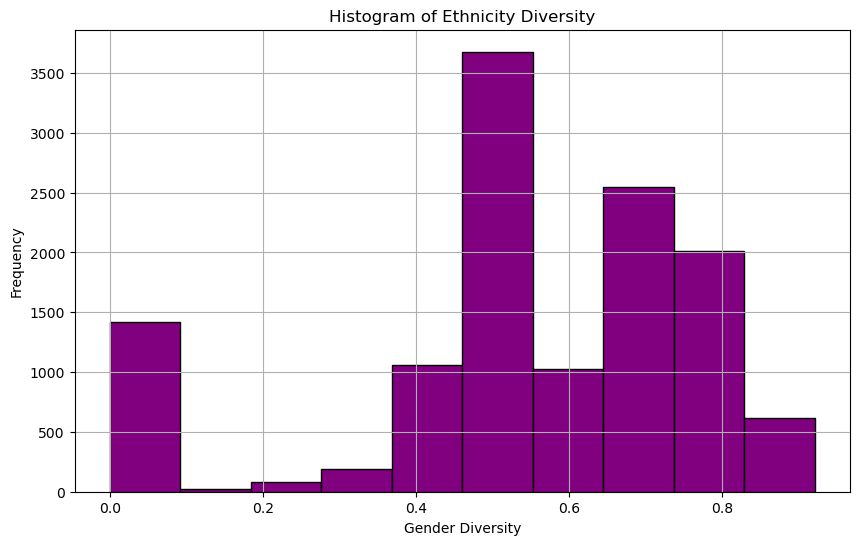

In [20]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(normalized_ethnicity_df['ethnicity_diversity'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Ethnicity Diversity')
plt.xlabel('Gender Diversity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Remarque : Je n'ai pas enlevé les films avec un rating count = 0 car certains d'entre eux ont tout de même un box office, et vice versa. Donc dans l'analyse de corrélation il faudra enlever 0 pour rating count et NaN pour box_office_revenue séparément

In [21]:
# Saving the dataframes as CSV files
normalized_df.to_csv('gender_diversity_df.csv', index=False)
normalized_ethnicity_df.to_csv('ethnicity_diversity.csv', index=False)

# Ethnicity clustered (ne marche pas bien, j'ai abandonné cette approche)

In [22]:
movie_char_eth["actor_ethnicity"].value_counts()

actor_ethnicity
Indian person                 16335
African Americans             10141
Jewish people                 10117
English people                 6163
Irish Americans                3856
                              ...  
Dinka people                      1
Sierra Leone Creole people        1
Goans                             1
Bohemian                          1
Han Chinese people                1
Name: count, Length: 435, dtype: int64

In [23]:
ethnic_groups = {
    "East Asian": [
        "Han Chinese people", "Zhuang people", "Ryukyuan people", "Manchu", "Gin people"
    ],
    "South Asian": [
        "Afghans in India", "Agrawal", "Bengali Brahmins", "Bengali Hindus", "Bengali people", "Bihari people",
        "Gujarati people", "Indian Americans", "Indian Australian", "Indian diaspora", "Indian diaspora in France",
        "Indian person", "Indo-Guyanese", "Kashmiri Pandit", "Kashmiri people", "Marathi people", "Nepali Indian",
        "Pakistani American", "Pakistani Canadians", "Pakistanis", "Punjabi diaspora", "Punjabis", "Rajput", "Sikh",
        "Sindhis", "Tamil Americans", "Tamil Brahmin", "Telugu Brahmins", "Telugu people"
    ],
    "Southeast Asian": [
        "Aceh", "Filipino Americans", "Filipino Australians", "Filipino mestizo", "Filipino people", 
        "Filipino people of Spanish ancestry", "Indonesian Americans", "Javanese", "Lao people", "Malayali", 
        "Malaysian Chinese", "Thai Americans", "Thai Chinese people", "Thai people", "Vietnamese Americans", 
        "Vietnamese people"
    ],
    "Middle Eastern": [
        "Afghanis", "Arabs", "Arab Americans", "Arab Mexican", "Arabs in Bulgaria", "Assyrian people", 
        "Azerbaijanis", "Copts", "Druze", "Hazaras", "Iraqi Americans", "Iranian Americans", "Iranian Canadians", 
        "Iranians", "Iranians in the United Kingdom", "Kurds", "Lebanese", "Lebanese Americans", 
        "Lebanese immigration to Mexico", "Lebanese people in the United Kingdom", "Palestinians", 
        "Palestinian American", "Persians", "Sudanese Arabs", "Syrian Americans"
    ],
    "European": [
        "Acadians", "Albanian American", "Albanians", "Anglo-Irish people", 
        "Austrians", "Austrian Americans", "Austrians in the United Kingdom", 
        "Baltic Russians", "Basque people", "Belgians", "Black Irish", "Bosniaks", 
        "Bosnians", "British people", "British Americans", "British Asian", 
        "British Chinese", "British Indian", "British Jamaicans", "British Jews", 
        "British Nigerian", "British Pakistanis", "Bulgarians", "Bulgarian Canadians", 
        "Cajun", "Castilians", "Catalan people", "Czech Americans", 
        "Czech Australians", "Czechs", "Danes", "Danish Americans", 
        "Danish Canadians", "Dalmatian Italians", "Dutch", "Dutch Americans", 
        "Dutch Australian", "Dutch Canadians", "English Americans", "English Australian", 
        "English Canadians", "English people", "Estonians", "Finnish Americans", 
        "Finns", "French", "French Americans", "French Canadians", "French Chilean", 
        "Galicians", "German Americans", "German Brazilians", "German Canadians", 
        "Germans", "Greek American", "Greek Australian", "Greek Canadians", 
        "Greek Cypriots", "Greeks in South Africa", "Greeks in the United Kingdom", 
        "Hungarian Americans", "Hungarians", "Icelandic", "Irish Americans", 
        "Irish Australian", "Irish Canadians", "Irish migration to Great Britain", 
        "Irish people", "Italian Americans", "Italian Australian", "Italian Brazilians", 
        "Italian Canadians", "Italian immigration to Mexico", "Italians", 
        "Italians in the United Kingdom", "Latvian American", "Latvians", 
        "Lithuanian American", "Lithuanian Jews", "Luxembourgish Americans", 
        "Manx people", "Norwegian Americans", "Norwegians", "Poles", 
        "Poles in the United Kingdom", "Polish Americans", "Polish Australians", 
        "Polish Canadians", "Portuguese", "Portuguese Americans", "Romanian Americans", 
        "Romanians", "Russian Americans", "Russian Canadians", "Russians", 
        "Rusyn American", "Scandinavian Americans", "Scotch-Irish Americans", 
        "Scottish American", "Scottish Australian", "Scottish Canadians", 
        "Scottish people", "Serbian Americans", "Serbian Australians", 
        "Serbian Canadians", "Serbs in North Macedonia", "Serbs in the United Kingdom", 
        "Serbs of Bosnia and Herzegovina", "Serbs of Croatia", "Slovak Americans", 
        "Slovaks", "Slovene American", "Slovenes", "Spanish American", 
        "Spanish immigration to Mexico", "Spanish people of Filipino ancestry", 
        "Swedish Americans", "Swedish Australian", "Swedish Canadians", 
        "Swedish-speaking population of Finland", "Swiss", "Ukrainian Americans", 
        "Ukrainian Canadians", "Ukrainians", "White British", "Welsh American", 
        "Welsh Italians", "Welsh people", "White Africans of European ancestry", 
        "White Americans", "White Latin American", "White South Africans"
    ],
    "Hispanic/Latino": [
        "Afro-Cuban", "Argentine", "Bolivian American", "Brazilian Americans", 
        "Brazilians", "Chilean American", "Chileans", "Chileans in the United Kingdom", 
        "Colombian Americans", "Colombian Australian", "Colombians", "Costa Ricans", 
        "Cuban American", "Cubans", "Dominican Americans", "Ecuadorian Americans", 
        "Hispanic", "Hispanic and Latino Americans", "Honduran Americans", "Hondurans", 
        "Mexican Americans", "Mexicans", "Panamanian American", "Peruvians in the United Kingdom", 
        "Puerto Ricans", "Salvadoran Americans", "Spaniards", "Venezuelan Americans", "Venezuelans"
    ],
    "African": [
        "African Americans", "African people", "Afrikaners", "Akan people", "Angolan", 
        "Bantu", "Berber", "Black British", "Black Canadians", "Black Hispanic and Latino Americans", 
        "Black people", "Dinka people", "Ghanaian American", "Ghanaians", "Gibraltarian people", 
        "Kabyle people", "Kenyan", "Kikuyu", "Malagasy people", "Mandinka people", 
        "Moroccan Americans", "Moroccan Jews", "Moroccans", "Mozambican", "Namibian", 
        "Nigerian American", "Sierra Leone Creole people", "Sierra Leoneans in the United Kingdom", 
        "Somali", "Somalis", "South African American", "Sudanese Australians", "Swazis", 
        "Tanzanian", "Togolese", "Ugandan", "Wolof people", "Xhosa people", "Yoruba people", 
        "Zimbabwean"
    ],
    "North American Indigenous": [
        "Apache", "Blackfoot Confederacy", "Cherokee", "Cheyennes", "Choctaw", "Cree", 
        "First Nations", "Five Nations", "Ho-Chunk", "Haudenosaunee", "Inuit", "Inupiat people", 
        "Lumbee", "Mohawk people", "Native Americans in the United States", "Native Hawaiians", 
        "Nez Perce", "Ojibwe", "Omaha people", "Oneida", "Sioux"
    ],
    "Pacific Islander": [
        "Chamorro", "Fijian", "Hawaiian", "Maori", "Marshallese", "Micronesian", 
        "Palauan", "Samoan American", "Samoan New Zealanders", "Tongan"
    ],
    "Australian Aboriginal": [
        "Aboriginal Australians", "Indigenous Australians", "Torres Strait Islanders"
    ]
}

In [24]:
def find_ethnic_group(ethnicity):
    """
    Finds and returns the group to which the given ethnicity belongs.

    Parameters:
    ethnicity (str): The ethnicity to find.
    ethnic_groups (dict): A dictionary of ethnic groups and their corresponding ethnicities.

    Returns:
    str: The group to which the ethnicity belongs, or 'Unknown' if not found.
    """
    for group, ethnicities in ethnic_groups.items():
        if ethnicity in ethnicities:
            return group
    return "Unknown"

In [25]:
# Updating the 'cluster' column in the dataset with the new categorizations

ethn_data = movie_char_eth.copy()

ethn_data['actor_ethnicity'] = ethn_data['actor_ethnicity'].map(find_ethnic_group)

# Recalculating the counts for each cluster
clustered_data_updated = ethn_data.groupby('actor_ethnicity')['actor_ethnicity'].count()

# Sorting the updated clustered data by count
clustered_data_sorted_updated = clustered_data_updated.sort_values(ascending=False)

clustered_data_sorted_updated

actor_ethnicity
European                     38461
Unknown                      26293
South Asian                  22299
African                      10546
Hispanic/Latino               2540
Southeast Asian               1567
North American Indigenous      653
Middle Eastern                 432
Australian Aboriginal           87
Pacific Islander                40
East Asian                      16
Name: actor_ethnicity, dtype: int64

In [27]:
df = calculate_ethnicity_diversity(ethn_data).sort_values(by="ethnicity_diversity", ascending=False)
df = df.drop_duplicates(subset='movie_freebase_id')

merged = df.merge(tmdb_extra_info, on='movie_freebase_id', how='inner')
merged = merged[['movie_freebase_id', 'movie_name', 'movie_release_year', 'movie_languages_count', 'movie_genres', 'ethnicity_diversity', 'actors_count', 'rating_average', 'rating_count', 'movie_box_office_revenue']]

merged = merged[merged["ethnicity_diversity"] > 0]

merged

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,ethnicity_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/06093b,100 Rifles,1969.0,22,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hj3n7y...",0.800000,5,5.800,84,3500000.0
1,/m/0f__19,Full Tilt Boogie,1998.0,22,"{""/m/0jtdp"": ""Documentary""}",0.800000,5,6.400,51,NaN
2,/m/026vskz,Renegades,1989.0,22,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.800000,5,5.600,302,9015164.0
3,/m/04m91p,Sneakers,1992.0,22,"{""/m/01jfsb"": ""Thriller"", ""/m/04btyz"": ""Heist""...",0.781250,8,6.903,820,105232691.0
4,/m/0kv57c,Deck the Halls,2006.0,22,"{""/m/0bwgnb"": ""Christmas movie"", ""/m/0hqxf"": ""...",0.781250,8,5.495,599,47231070.0
...,...,...,...,...,...,...,...,...,...,...
8459,/m/0b7dgsg,Unchained Memories: Readings from the Slave Na...,2003.0,22,"{""/m/0jtdp"": ""Documentary""}",0.124444,15,5.900,5,NaN
8460,/m/065zlr,Nutty Professor II: The Klumps,2000.0,22,"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",0.124444,15,4.977,1213,166339890.0
8461,/m/050f0s,The Simpsons Movie,2007.0,22,"{""/m/0gf28"": ""Parody"", ""/m/03k9fj"": ""Adventure...",0.104938,18,6.999,7518,527071022.0
8462,/m/03177r,Harry Potter and the Prisoner of Azkaban,2004.0,22,"{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",0.083176,23,8.019,20324,796688549.0


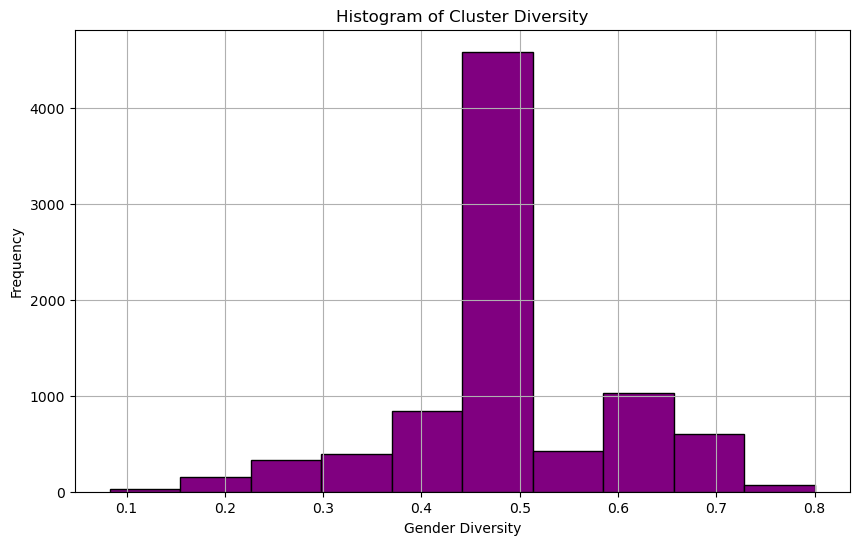

In [30]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged['ethnicity_diversity'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Cluster Diversity')
plt.xlabel('Gender Diversity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()